In [ ]:
############# Note: There are so many projects on this cosmos, However how many of them teach you and learn from them. Folow this project for learning and say something afterthat.##############

Problem statement (simple & realistic)

Can we predict whether a student will pass or fail based on their study behavior and context?

Why creating our own dataset is PERFECT for learning

When you use ready-made datasets (Titanic, Iris, etc.), you miss many real-world steps.

By creating our own dataset, you will learn:


✅ Problem framing (business + ML thinking)

✅ Feature design (why this column exists)

✅ Data generation logic

✅ Noise, bias, and assumptions

✅ End-to-end ML lifecycle (CRISP-DM style)

This is gold-level learning 🥇

---



In [ ]:
# ML steps we will follow (NO shortcuts)

# We’ll follow this strict learning pipeline:

# Problem understanding

# Dataset creation (from scratch)

# Exploratory Data Analysis (EDA)

# Data quality checks

# Feature engineering

# Encoding categorical data

# Train–test split

# Baseline model (Logistic Regression)

# Model evaluation (accuracy, confusion matrix)

# Error analysis

# Improvements (features, threshold, models)

# Final conclusions + documentation

# This will feel like a real company project 💼

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 100

data = pd.DataFrame({
    "date": pd.date_range(start="2024-01-01", periods=n, freq="D"),
    "student_id": np.random.choice(["S1", "S2", "S3", "S4", "S5"], n),
    "hours_studied": np.round(np.random.uniform(0, 8, n), 1),
    "attendance": np.random.randint(50, 100, n),
    "previous_score": np.random.randint(30, 95, n),
    "study_type": np.random.choice(["self", "group", "online"], n)
})

# Simple rule-based target (for learning)
data["pass_fail"] = np.where(
    (data["hours_studied"] >= 3) &
    (data["attendance"] >= 75) &
    (data["previous_score"] >= 50),
    1, 0
)

data.head()


,date,student_id,hours_studied,attendance,previous_score,study_type,pass_fail
0,2024-01-01,S4,7.3,60,53,self,0
1,2024-01-02,S5,6.8,77,75,group,1
2,2024-01-03,S3,3.6,74,82,group,0
3,2024-01-04,S5,0.8,99,89,self,0
4,2024-01-05,S5,3.0,72,92,online,0




Problem Statement (Notebook text)
🎯 Why are we doing this?

Many students fail exams not because they are weak,
but because of poor study habits, low attendance, or lack of planning.

In this project, we build a simple Machine Learning model to predict
whether a student will pass or fail, using study-related features.

👉 ML Framing:

Input → student behavior

Output → pass (1) / fail (0)

Type → Binary Classification



In [2]:
# Code: Basic data inspection
data.shape

(100, 7)

This shows number of rows and columns simple learners

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            100 non-null    datetime64[ns]
 1   student_id      100 non-null    object        
 2   hours_studied   100 non-null    float64       
 3   attendance      100 non-null    int64         
 4   previous_score  100 non-null    int64         
 5   study_type      100 non-null    object        
 6   pass_fail       100 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 5.6+ KB


since ,we have started the project make sure check each step carefully because this is where we built foundation of anything and then built Burj khalifa after that.

In [5]:
data.describe(include='all')


,date,student_id,hours_studied,attendance,previous_score,study_type,pass_fail
count,100,100,100.000000,100.000000,100.000000,100,100.000000
unique,NaN,5,NaN,NaN,NaN,3,NaN
top,NaN,S4,NaN,NaN,NaN,self,NaN
freq,NaN,26,NaN,NaN,NaN,43,NaN
mean,2024-02-19 12:00:00,NaN,3.891000,76.440000,65.250000,NaN,0.290000
min,2024-01-01 00:00:00,NaN,0.000000,50.000000,30.000000,NaN,0.000000
25%,2024-01-25 18:00:00,NaN,2.000000,66.000000,47.750000,NaN,0.000000
50%,2024-02-19 12:00:00,NaN,3.750000,78.000000,66.500000,NaN,0.000000
75%,2024-03-15 06:00:00,NaN,5.600000,86.250000,83.250000,NaN,1.000000
max,2024-04-09 00:00:00,NaN,8.000000,99.000000,94.000000,NaN,1.000000


Total Entries: 100
Student IDs: 5 unique students, with 'S4' appearing most frequently (26 times).
Hours Studied:
Average: 3.9 hours
Range: 0 to 8 hours
Attendance:
Average: 76.44%
Range: 50% to 99%
Previous Score:
Average: 65.25
Range: 30 to 94
Study Type: 3 unique types, with 'self' being the most common (43 times).
Pass/Fail: 29% of students passed (represented by 1).


In [6]:
data["pass_fail"].value_counts()


,count
pass_fail,
0,71
1,29


In [7]:
data["pass_fail"].value_counts(normalize=True)


,proportion
pass_fail,
0,0.71
1,0.29


In [ ]:
# Why?

# To know if model will be biased

# To decide evaluation metric (accuracy vs recall vs precision)

# 📌 Key rule:

# We always CHECK imbalance early,
# but we don’t always FIX it immediately.

<Axes: title={'center': 'Target Distribution: Pass vs Fail'}, xlabel='pass_fail'>

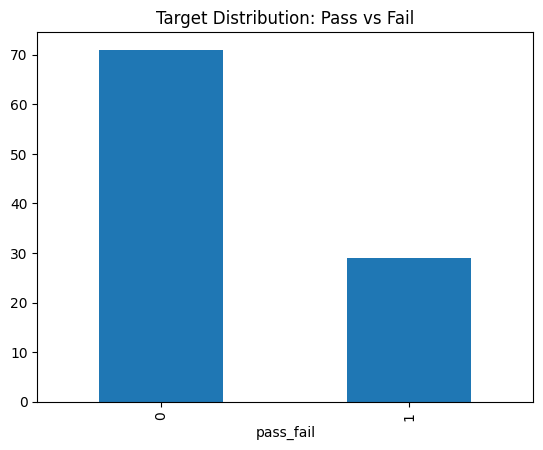

In [8]:
data["pass_fail"].value_counts().plot(kind="bar", title="Target Distribution: Pass vs Fail")


In [9]:
# We only answer:

# ❓ Is imbalance present?

# Even if imbalance exists:

# We note it

# We continue naturally

# This is how real ML projects work.

In [10]:
# Train–Test Split (Now we move)
# 🧠 Why splitting happens HERE

# We now have:

# Clean features

# Known target behavior

# Now we protect future data.

In [12]:
# Check for missing values
print(data.isnull().sum())

date              0
student_id        0
hours_studied     0
attendance        0
previous_score    0
study_type        0
pass_fail         0
dtype: int64


DATA CLEANING (ONLY THIS PHASE)

👉 Goal:
Make sure the data is clean, usable, and safe before ML sees it.

Simple analogy 🧹

Before cooking food 🍳, you:

wash vegetables

remove bad parts

check nothing is spoiled

That’s data cleaning.

In [13]:
# Check Duplicate Rows
# Why?

# Duplicate records can mislead the model, like counting the same student twice.

data.duplicated().sum()

np.int64(0)

In [14]:
# Check Data Types (Sanity Check)

# We already saw this in understanding, but here we confirm:

data.dtypes

,0
date,datetime64[ns]
student_id,object
hours_studied,float64
attendance,int64
previous_score,int64
study_type,object
pass_fail,int64


What we expect:

date → datetime

hours_studied, attendance, previous_score → numeric

study_type, student_id → categorical

pass_fail → numeric (0/1)

✅ If this matches → good to proceed

In [22]:
# Drop non-useful columns

# date → not useful for baseline

# student_id → ID, not predictive (for now)

df = data.drop(columns=["date", "student_id"])

In [24]:
# Encode categorical feature (study_type)

# Baseline = simple & clean

df = pd.get_dummies(df, columns=["study_type"], drop_first=True)

In [25]:
# Split features & target
X = df.drop("pass_fail", axis=1)
y = df["pass_fail"]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [27]:
# Train the baseline model
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [28]:
# Make predictions
y_pred = baseline_model.predict(X_test)
y_pred_proba = baseline_model.predict_proba(X_test)[:, 1]

In [29]:
#PHASE 6: BASELINE ERROR EVALUATION 🔥

#This is where real ML thinking starts.

#6.1 Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  2],
       [ 1,  6]])

In [ ]:
# Accuracy – Overall how many predictions were correct: 0.88 → 88% correct.

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.75      0.86      0.80         7

    accuracy                           0.88        25
   macro avg       0.85      0.87      0.86        25
weighted avg       0.89      0.88      0.88        25



In [31]:
#ROC-AUC (Better baseline metric)
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_proba)

np.float64(0.9444444444444444)

In [32]:
# Try different thresholds

# Default threshold is 0.5:

# If prob ≥ 0.5 → class 1

# Else → class 0

# We can try thresholds like 0.3, 0.4, 0.6, 0.7 and see how precision/recall changes.

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for t in thresholds:
    y_pred_thresh = (y_pred_proba >= t).astype(int)
    print(f"Threshold: {t}")
    print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
    print("Precision:", precision_score(y_test, y_pred_thresh))
    print("Recall:", recall_score(y_test, y_pred_thresh))
    print("F1-score:", f1_score(y_test, y_pred_thresh))
    print("-"*30)

Threshold: 0.3
Accuracy: 0.92
Precision: 0.7777777777777778
Recall: 1.0
F1-score: 0.875
------------------------------
Threshold: 0.4
Accuracy: 0.88
Precision: 0.75
Recall: 0.8571428571428571
F1-score: 0.8
------------------------------
Threshold: 0.5
Accuracy: 0.88
Precision: 0.75
Recall: 0.8571428571428571
F1-score: 0.8
------------------------------
Threshold: 0.6
Accuracy: 0.92
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571
------------------------------
Threshold: 0.7
Accuracy: 0.92
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571
------------------------------


In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# then plot fpr vs tpr, or pick threshold for best trade-off

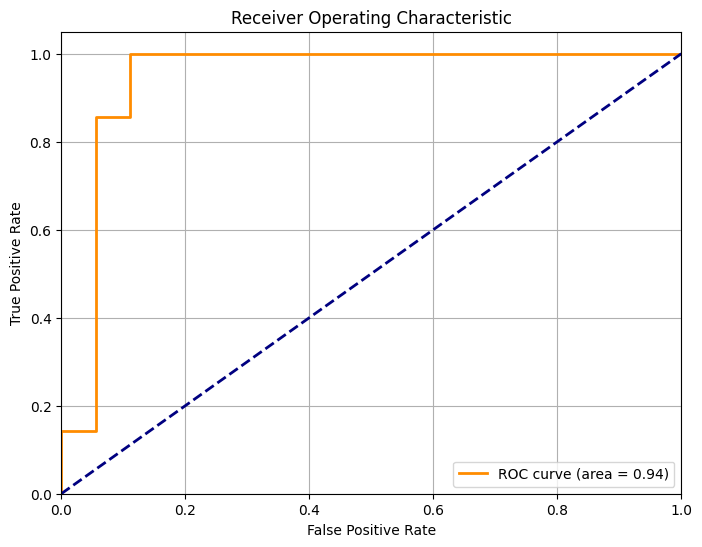

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()